In [1]:
import matplotlib.pylab as plt
import pandas as pd
import sklearn.metrics
import sklearn.neighbors
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
dt1 = pd.read_csv('2015.csv')
dt2 = pd.read_csv('2016.csv')
dt3 = pd.read_csv('2017.csv')
dt4 = pd.read_csv('2018.csv')
dt5 = pd.read_csv('2019.csv')

In [13]:
dt5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [14]:
y = dt5['Score']

In [17]:
X = dt5.drop(['Overall rank', 'Country or region','Score'], axis = 1)
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
X = sm.add_constant(X)

# (1)
* The domain question for this data set is what elements influence the happiness of each country and how much do they infulence.
* Can we get coefficience to each elements so that we can messure how they influence the happiness scores. 

* The data set if from kaggle.

# (2)
* exploratory analysis and data visulization

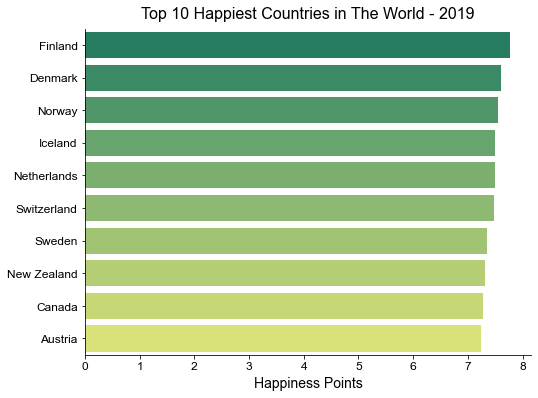

In [21]:
happy_10 = dt5[['Country or region', 'Score']].head(10)
plt.figure(figsize = (8,6)) # Set the figure width and height

# Bar chart showing top 20 countries with highest contribution of GDP per capita on Hapiness level
ax = sns.barplot(x='Score', y='Country or region', data=happy_10, palette='summer')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Happiest Countries in The World - 2019", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

* This graph shows the word top-10 happy country and their happiness points

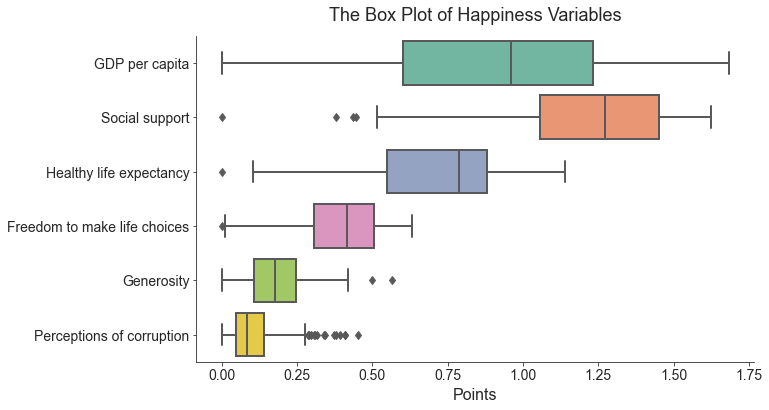

In [23]:
cols = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption',]

# Unpivot or melt the dataframe
df_melt = pd.melt(dt5, id_vars=['Country or region'], 
                  value_vars=cols, 
                  var_name='variable', 
                  value_name='point')

# Set the figure width and height
plt.figure(figsize = (10,6))

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title('The Box Plot of Happiness Variables', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

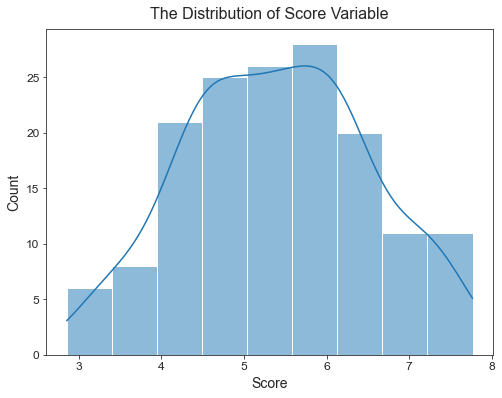

In [25]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Plot the distribution of the score measurement
ax = sns.histplot(dt5['Score'], kde=True)

# Set the title, the labels, and custom ticks
plt.title('The Distribution of Score Variable', fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

* The distribution of the happiness score is nearly normal distribution which means most countries has about average happiness score while only a few countries has extremely high or low happiness score.

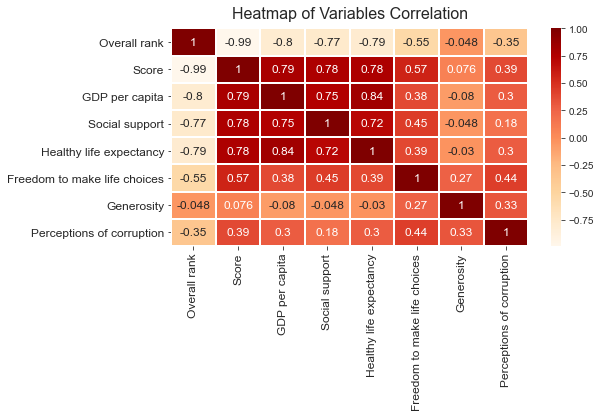

In [27]:
# Get the correlation between variables in the dataframe
corr = dt5.corr()

# Set the figure width and height
plt.figure(figsize = (8,4))

# Set the color to use for the heatmap
cmap = sns.color_palette("OrRd", as_cmap=True)

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":12}, cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Heatmap of Variables Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

* This map shows the correlation of each variables.
* In this map, GDP, social support and healthy life expectancy has relatively high correlation to the happiness score.
* Generosity has ralatively low correlation to the happiness socre.

In [30]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(dt5, locations='Country or region',
                    locationmode = "country names",
                    color="Score",
                    hover_name = 'Country or region',
                    hover_data={'Country or region':False,
                                'Overall rank': True
                               }
                   )
fig.update_layout(width=900, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

* Based on the map above, countries in America and Austrilia has the highest happiess
* Countries in Asia has the middle happiness.
* Countries in Africa has the lowest happiness.

<AxesSubplot:xlabel='Country or region', ylabel='Score'>

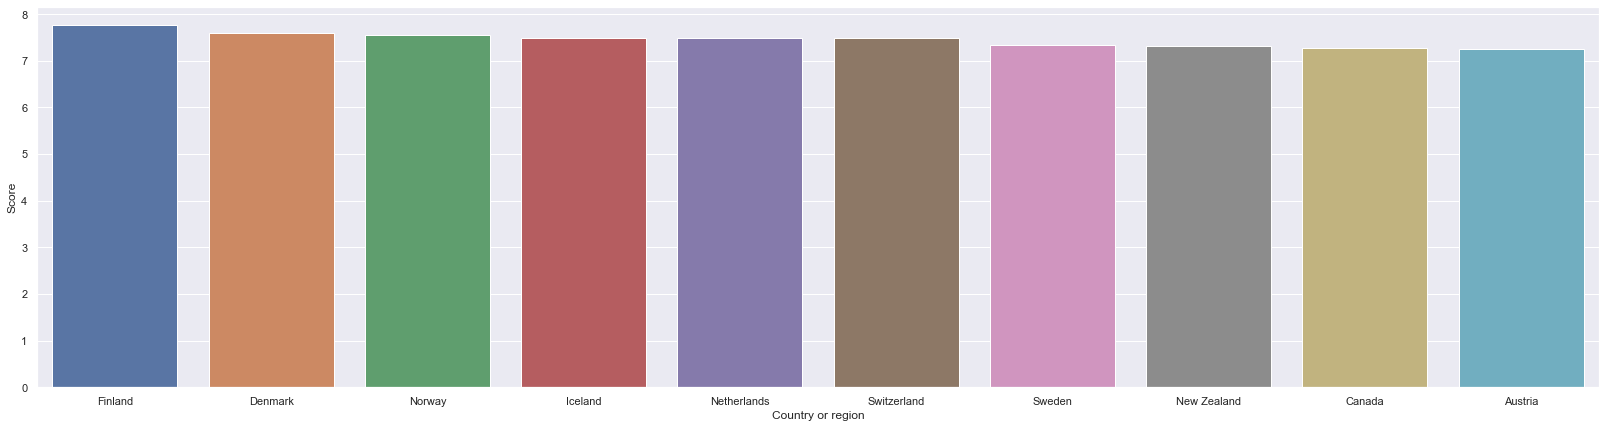

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(28,7))
sns.barplot(x="Country or region",y="Score",data=dt5.head(10))

In [35]:
est=sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.40e-46
Time:                        14:18:22   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The OLS model shows that the 'Freedom to make life choices' has the highest coef which is 1.45. 
* The social support and healthy life expextancy also has high coef which i s 1.12 and 1.08.
* These three elements have relatively high impact to the happiness score. 